## Aufgabe 1 Aufgabenteil 2
### 2.1

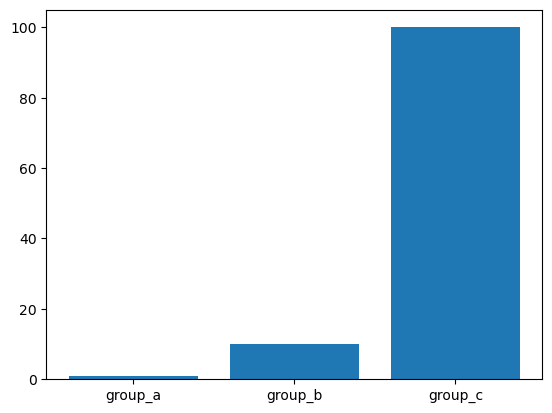

### 2.2

### 2.3

### 2.4

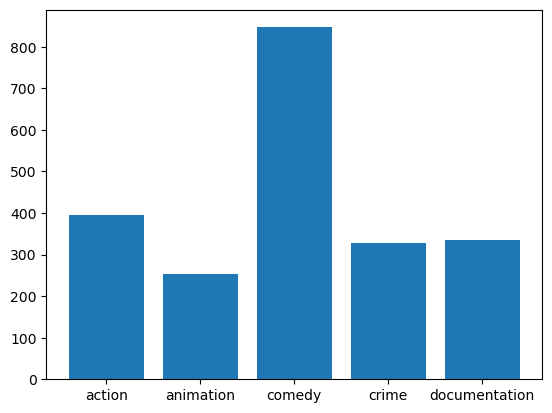

In [6]:
import matplotlib.pyplot as plot
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

names = ['action', 'animation', 'comedy', 'crime', 'documentation']
values = []
for c in names:
    values.append(data[c].sum())

fix, ax = plot.subplots()

ax.bar(names, values)

plot.show()

### 2.5